There are deminishing returns for reviews.

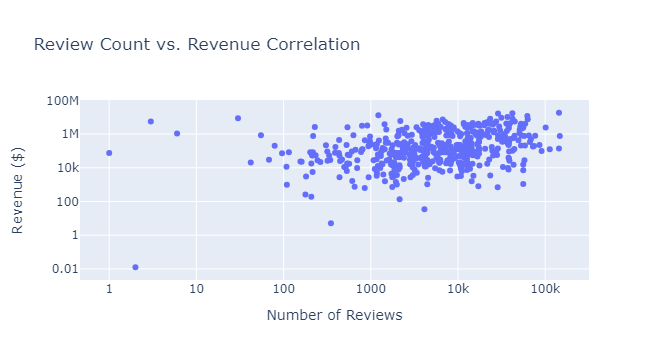

In [10]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the 'Segment Products' data
product_data = pd.read_excel('../Customer_Success_Engineer_-_Project_Data.xlsx', sheet_name='Segment Products', header=1)

# Create the scatter plot
fig = px.scatter(product_data, x='# of Reviews', y='Revenue', title='Review Count vs. Revenue Correlation')

# Improve the layout
fig.update_layout(
    xaxis_title='Number of Reviews',
    yaxis_title='Revenue ($)',
    xaxis_type='log',  # Use a log scale if the data spans several orders of magnitude
    yaxis_type='log'
)

# Show the figure
fig.show()


 Average Reviews vs. Revenue: Dual-axis line chart showing how average reviews correlate with revenue.

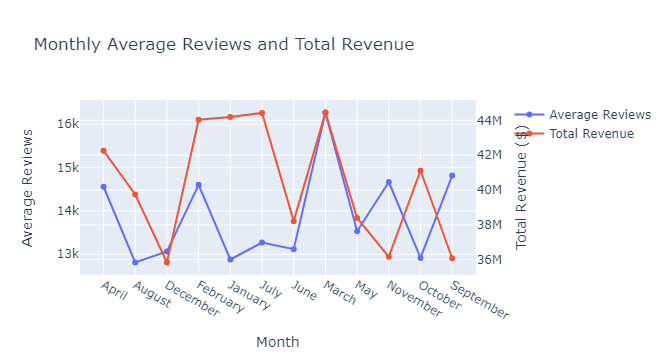

In [11]:
# Load your data here
data = pd.read_excel('../Customer_Success_Engineer_-_Project_Data.xlsx', sheet_name='Monthly', header=1)

# We would group by Month, calculating the average Reviews and summing the Revenue
monthly_summary = data.groupby('Month').agg({
    'Reviews': 'mean',
    'Revenue': 'sum'
}).reset_index()

# Create figure with secondary y-axis for Revenue using make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Reviews trace on primary y-axis
fig.add_trace(
    go.Scatter(x=monthly_summary['Month'], y=monthly_summary['Reviews'], name='Average Reviews', mode='lines+markers'),
    secondary_y=False,
)

# Add Revenue trace on secondary y-axis
fig.add_trace(
    go.Scatter(x=monthly_summary['Month'], y=monthly_summary['Revenue'], name='Total Revenue', mode='lines+markers'),
    secondary_y=True,
)

# Add titles and axis labels
fig.update_layout(
    title_text='Monthly Average Reviews and Total Revenue'
)

fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Average Reviews', secondary_y=False)
fig.update_yaxes(title_text='Total Revenue ($)', secondary_y=True)

# Show the plot
fig.show()
